In [1]:
from imblearn.over_sampling import SMOTE

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from os import listdir
from os.path import isfile, join
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.svm import SVC, SVR
import os
import cv2

In [3]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters
from skimage.exposure import rescale_intensity
from skimage.data import camera
from skimage.util import compare_images
from skimage import exposure
from skimage import data, img_as_float
from skimage import exposure

In [4]:
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [5]:
mypath = "C:/Users/User/Desktop/CUNY/Faces_img/cropped.tar/cropped/crop_part1"

In [6]:
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [mypath +'/' + x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
filedf = pd.DataFrame(data = splitcolumns, columns = filecolumns)
filedfnona = filedf.dropna()
filedfnona['age']  = filedfnona['age'].astype(int)
filedfnona['race'] = filedfnona['race'].astype(int)
filedfnona['gender'] = filedfnona['gender'].astype(int)

In [7]:
filedfnona.head()

,age,gender,race,file
0,100,1,0,C:/Users/User/Desktop/CUNY/Faces_img/cropped.t...
1,100,1,2,C:/Users/User/Desktop/CUNY/Faces_img/cropped.t...
2,101,1,2,C:/Users/User/Desktop/CUNY/Faces_img/cropped.t...
3,10,0,0,C:/Users/User/Desktop/CUNY/Faces_img/cropped.t...
4,10,0,0,C:/Users/User/Desktop/CUNY/Faces_img/cropped.t...


In [8]:
image1 = plt.imread(filedfnona['file'][0])
image1.shape

(200, 200, 3)

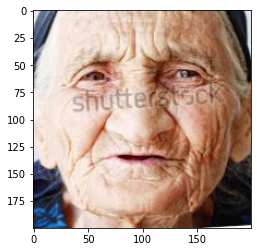

In [9]:
plt.imshow(image1)
plt.show()

In [10]:
images = []
for img_path in filedfnona['file']:
    image = plt.imread(img_path)
    images.append(image) 

In [11]:
imagesArray = np.array(images)

In [12]:
def sobel_each(image):
    return filters.sobel(image)
def sobel_hsv(image):
    return filters.sobel(image)

In [13]:
def sobelFilterTypes(imagesArray):
    """
    This function takes as input an array of pictures and returns two arrays. The first array has the 
    Sobel filter apply to each picture channel and the second one is applied on the image's hsv. The images are in color
    """
    #filter apply to pictures channel
    filterChannel = []
    #filter apply to hue, saturation, value
    filterHSV = []
    for image in imagesArray:
        image1 = rescale_intensity(1 - sobel_each(image))
        image2 = rescale_intensity(1 - sobel_hsv(image))
        filterChannel.append(image1)
        filterHSV.append(image2)
    return np.array(filterChannel), np.array(filterHSV)

In [14]:
imagesArray.shape

(9778, 200, 200, 3)

In [15]:
sobel = list(sobelFilterTypes(imagesArray))
sobel1 = sobel[0]
sobel2 = sobel[1]

In [12]:
imagesArray.dtype

dtype('uint8')

### Sobel1 - Gender

In [44]:
X_train, X_test, y_train, y_test = train_test_split(sobel1, filedfnona['gender'], test_size=0.33, random_state=42)

In [45]:
X_train.shape

(6551, 200, 200, 3)

In [46]:
X_scaled=X_train/255.0

In [47]:
X_test_sc=X_test/255.0

In [48]:
X_test_sc.shape

(3227, 200, 200, 3)

In [49]:
nimages, nX, ny, nrgb = X_scaled.shape
X_scaled = X_scaled.reshape((nimages,nX*ny*nrgb))

In [50]:
nimages, nx, ny, nrgb = X_test_sc.shape
X_test_sc = X_test_sc.reshape((nimages,nx*ny*nrgb))

In [51]:
X_scaled.dtype

dtype('float64')

In [52]:
X_scaled.shape

(6551, 120000)

In [53]:
model = SVC(kernel = 'linear', C=1.0, random_state=42, verbose = True)

In [54]:
model.fit(X_scaled, y_train)

[LibSVM]

SVC(kernel='linear', random_state=42, verbose=True)

In [55]:
y_pred_gender = model.predict(X_scaled)

In [56]:
print(f"accuracy: {accuracy_score(y_train, y_pred_gender)}")
print(f"{classification_report(y_train, y_pred_gender)}")

accuracy: 0.7337811021218135
              precision    recall  f1-score   support

           0       0.82      0.52      0.63      2921
           1       0.70      0.91      0.79      3630

    accuracy                           0.73      6551
   macro avg       0.76      0.71      0.71      6551
weighted avg       0.75      0.73      0.72      6551



In [57]:
y_pred_test_gender = model.predict(X_test_sc)
print(f"accuracy: {accuracy_score(y_test, y_pred_test_gender)}")
print(f"{classification_report(y_test, y_pred_test_gender)}")

accuracy: 0.7065385807251316
              precision    recall  f1-score   support

           0       0.79      0.48      0.59      1451
           1       0.68      0.89      0.77      1776

    accuracy                           0.71      3227
   macro avg       0.73      0.69      0.68      3227
weighted avg       0.73      0.71      0.69      3227



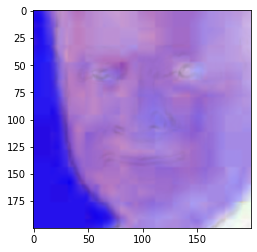

In [58]:
plt.imshow(X_train[5])

([<matplotlib.axis.YTick at 0x2228a796eb0>,
 [Text(0, 0, '0-Male'), Text(0, 1, '1-Female')])

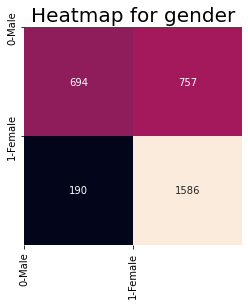

In [69]:
mat = metrics.confusion_matrix(y_test, y_pred_test_gender)
sns.heatmap(mat, square = True, annot=True, fmt = 'd', cbar = False)
plt.title('Heatmap for gender', size = 20)
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["0-Male", "1-Female"], rotation=90, size = 10)
plt.yticks(tick_marks, ["0-Male", "1-Female"], size = 10)


### Sobel2 - Gender

In [14]:
X_tr_gender, X_test_gender, y_tr_gender, y_test_gender = train_test_split(sobel2, filedfnona['gender'], test_size=0.33, random_state=42)

In [16]:
X_tr_gender=X_tr_gender/255.0
X_test_gender=X_test_gender/255.0

In [17]:
nimages, nX, ny, nrgb = X_tr_gender.shape
X_tr_gender = X_tr_gender.reshape((nimages,nX*ny*nrgb))

In [18]:
nimages, nx, ny, nrgb = X_test_gender.shape
X_test_gender = X_test_gender.reshape((nimages,nx*ny*nrgb))

In [19]:
model_sobel2 = SVC(kernel = 'linear', C=1.0, random_state=42, verbose = True)

In [21]:
model_sobel2.fit(X_tr_gender, y_tr_gender)

[LibSVM]

SVC(kernel='linear', random_state=42, verbose=True)

In [22]:
y_pred__sobel2 = model_sobel2.predict(X_tr_gender)

In [23]:
print(f"accuracy: {accuracy_score(y_tr_gender, y_pred__sobel2)}")
print(f"{classification_report(y_tr_gender, y_pred__sobel2)}")

accuracy: 0.7337811021218135
              precision    recall  f1-score   support

           0       0.82      0.52      0.63      2921
           1       0.70      0.91      0.79      3630

    accuracy                           0.73      6551
   macro avg       0.76      0.71      0.71      6551
weighted avg       0.75      0.73      0.72      6551



In [24]:
y_pred_test_sobel2_gender = model_sobel2.predict(X_test_gender)
print(f"accuracy: {accuracy_score(y_test_gender, y_pred_test_sobel2_gender)}")
print(f"{classification_report(y_test_gender, y_pred_test_sobel2_gender)}")

accuracy: 0.7065385807251316
              precision    recall  f1-score   support

           0       0.79      0.48      0.59      1451
           1       0.68      0.89      0.77      1776

    accuracy                           0.71      3227
   macro avg       0.73      0.69      0.68      3227
weighted avg       0.73      0.71      0.69      3227



### Sobel1 - Race

In [14]:
X_train_sobel1_race, X_test_sobel1_race, y_train_sobel1_race, y_test_sobel1_race = train_test_split(sobel1, filedfnona['race'], test_size=0.33, random_state=42)

In [16]:
X_train_sobel1_race=X_train_sobel1_race/255.0

In [17]:
X_test_sobel1_race=X_test_sobel1_race/255.0

In [18]:
nimages, nX, ny, nrgb = X_train_sobel1_race.shape
X_train_sobel1_race = X_train_sobel1_race.reshape((nimages,nX*ny*nrgb))

In [19]:
nimages, nX, ny, nrgb = X_test_sobel1_race.shape
X_test_sobel1_race = X_test_sobel1_race.reshape((nimages,nX*ny*nrgb))

In [21]:
model_sobel1_race = SVC(kernel = 'linear', C=1.0, random_state=42, verbose = True)

In [22]:
model_sobel1_race.fit(X_train_sobel1_race, y_train_sobel1_race)

[LibSVM]

SVC(kernel='linear', random_state=42, verbose=True)

In [23]:
y_pred__sobel1_race = model_sobel1_race.predict(X_train_sobel1_race)

In [24]:
print(f"accuracy: {accuracy_score(y_train_sobel1_race, y_pred__sobel1_race)}")
print(f"{classification_report(y_train_sobel1_race, y_pred__sobel1_race)}")

accuracy: 0.5385437337811021
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      3525
           1       0.00      0.00      0.00       281
           2       0.00      0.00      0.00      1035
           3       1.00      0.00      0.01       955
           4       0.00      0.00      0.00       755

    accuracy                           0.54      6551
   macro avg       0.31      0.20      0.14      6551
weighted avg       0.44      0.54      0.38      6551



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
y_pred_test_sobel1_race = model_sobel1_race.predict(X_test_sobel1_race)
print(f"accuracy: {accuracy_score(y_test_sobel1_race, y_pred_test_sobel1_race)}")
print(f"{classification_report(y_test_sobel1_race, y_pred_test_sobel1_race)}")

accuracy: 0.5392004958165478
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1740
           1       0.00      0.00      0.00       124
           2       0.00      0.00      0.00       518
           3       0.00      0.00      0.00       497
           4       0.00      0.00      0.00       348

    accuracy                           0.54      3227
   macro avg       0.11      0.20      0.14      3227
weighted avg       0.29      0.54      0.38      3227



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Heatmap for Race')

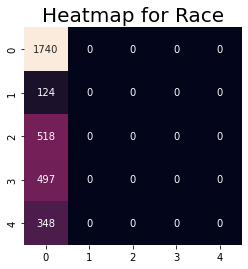

In [27]:
mat_race = metrics.confusion_matrix(y_test_sobel1_race, y_pred_test_sobel1_race)
sns.heatmap(mat_race, square = True, annot=True, fmt = 'd', cbar = False)
plt.title('Heatmap for Race', size = 20)
#tick_marks = np.arange(4)
#plt.xticks(tick_marks, ["0", "1", "2", "3", "4"], rotation=90, size = 10)
#plt.yticks(tick_marks, ["0", "1", "2", "3", "4"], size = 10)

### Sobel2 - Race

In [16]:
X_tr_race, X_test_race, y_tr_race, y_test_race = train_test_split(sobel2, filedfnona['race'], test_size=0.33, random_state=42)

In [17]:
X_tr_race=X_tr_race/255.0


In [18]:
X_test_race=X_test_race/255.0

In [19]:
nimages, nX, ny, nrgb = X_tr_race.shape
X_tr_race = X_tr_race.reshape((nimages,nX*ny*nrgb))

In [20]:
nimages, nx, ny, nrgb = X_test_race.shape
X_test_race = X_test_race.reshape((nimages,nx*ny*nrgb))

In [21]:
model_sobel2_race = SVC(kernel = 'linear', C=1.0, random_state=42, verbose = True)

In [ ]:
model_sobel2_race.fit(X_tr_race, y_tr_race)

[LibSVM]

In [ ]:
y_pred__sobel2_race = model_sobel2_race.predict(X_tr_race)

In [ ]:
print(f"accuracy: {accuracy_score(y_tr_race, y_pred__sobel2_race)}")
print(f"{classification_report(y_tr_race, y_pred__sobel2_race)}")

In [ ]:
y_pred_test_sobel2_race = model_sobel2_race.predict(X_test_race)
print(f"accuracy: {accuracy_score(y_test_race, y_pred_test_sobel2_race)}")
print(f"{classification_report(y_test_race, y_pred_test_sobel2_race)}")

In [ ]:
#Sobel1 age
X_train_sobel1_age, X_test_sobel1_age, y_train_sobel1_age, y_test_sobel1_age = train_test_split(sobel1, filedfnona['age'], test_size=0.33, random_state=42)

In [ ]:
X_train_sobel1_age=X_train_sobel1_age/255.0

In [ ]:
nimages, nX, ny, nrgb = X_train_sobel1_age.shape
X_train_sobel1_age = X_train_sobel1_age.reshape((nimages,nX*ny*nrgb))

In [ ]:
X_test_sobel1_age=X_test_sobel1_age/255.0

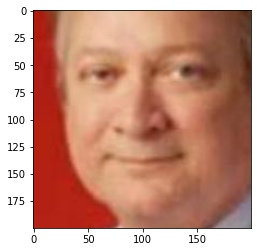

In [37]:
plt.imshow(X_train[5])

In [39]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_img, filedfnona['gender'], random_state=9, test_size=0.33)
#scaling the features
X_train_scaledlr = X_train_lr/255.0
X_test_scaledlr = X_test_lr/255.0

In [52]:
nimages, nX, ny, nrgb = X_test_scaledlr.shape
X_test_scaledlr = X_test_scaledlr.reshape((nimages,nX*ny*nrgb))

In [ ]:
nimages, nX, ny, nrgb = X_train_scaledlr.shape
X_train_scaledlr = X_train_scaledlr.reshape((nimages,nX*ny*nrgb))

In [43]:
X_train_scaledlr.shape

(6551, 120000)

In [44]:
clf = LogisticRegression(penalty='none', 
                         tol=0.1, solver='saga',
                         multi_class='multinomial').fit(X_train_scaledlr, y_train_lr)

#to check the shape of the coefficient matrix
clf.coef_.shape

(1, 120000)

In [53]:
# Predict using test data
predictions = clf.predict(X_test_scaledlr)

In [54]:
# Compute confusion matrix
cm = metrics.confusion_matrix(y_test_lr, predictions)

In [55]:
# Calculate accuracy score of the model 
score = accuracy_score(y_test_lr, predictions)
print("Model Accuracy Score: " + str(score*100) + "%")

Model Accuracy Score: 78.30802603036877%


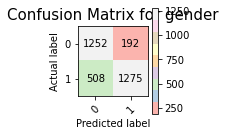

In [64]:
plt.figure(figsize=(2,2))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion Matrix for gender', size = 15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["0", "1"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 10)
plt.xlabel('Predicted label', size = 10)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

In [65]:
balanced = filedfnona
balanced.head()

,age,gender,race,file
0,100,1,0,C:/Users/User/Desktop/CUNY/Faces_img/cropped.t...
1,100,1,2,C:/Users/User/Desktop/CUNY/Faces_img/cropped.t...
2,101,1,2,C:/Users/User/Desktop/CUNY/Faces_img/cropped.t...
3,10,0,0,C:/Users/User/Desktop/CUNY/Faces_img/cropped.t...
4,10,0,0,C:/Users/User/Desktop/CUNY/Faces_img/cropped.t...


In [66]:
balanced['age']=np.where((balanced.age==2), 1, balanced.age)


In [67]:
balanced['age']=np.where(((balanced.age>=3) & (balanced.age<6)), 2, balanced.age)

In [68]:
balanced['age']=np.where(((balanced.age>=6) & (balanced.age<9)), 3, balanced.age)

In [69]:
balanced['age']=np.where(((balanced.age>=9) & (balanced.age<12)), 4, balanced.age)

In [70]:
balanced['age']=np.where(((balanced.age>=12) & (balanced.age<21)), 5, balanced.age)

In [71]:
balanced['age']=np.where(((balanced.age>=21) & (balanced.age<36)), 6, balanced.age)

In [72]:
balanced['age']=np.where(((balanced.age>=36) & (balanced.age<51)), 7, balanced.age)

In [73]:
balanced['age']=np.where(((balanced.age>=51) & (balanced.age<80)), 8, balanced.age)

In [74]:
balanced['age']=np.where((balanced.age>=80), 9, balanced.age)

In [75]:
balanced['age'].value_counts()

6    2015
8    1866
1    1587
7    1213
5    1118
2     724
3     476
9     417
4     362
Name: age, dtype: int64

In [86]:
balanced['age']

0       9
1       9
2       9
3       4
4       4
       ..
9773    4
9774    4
9775    4
9776    4
9777    4
Name: age, Length: 9778, dtype: int32

In [76]:
Xa_train_lr, Xa_test_lr, ya_train_lr, ya_test_lr = train_test_split(X_img, balanced['age'], random_state=9, test_size=0.33)
#scaling the features
Xa_train_scaledlr = Xa_train_lr/255.0
Xa_test_scaledlr = Xa_test_lr/255.0

In [77]:
nimages, nX, ny, nrgb = Xa_test_scaledlr.shape
Xa_test_scaledlr = Xa_test_scaledlr.reshape((nimages,nX*ny*nrgb))

In [78]:
nimages, nX, ny, nrgb = Xa_train_scaledlr.shape
Xa_train_scaledlr = Xa_train_scaledlr.reshape((nimages,nX*ny*nrgb))

In [87]:
clf_age = LogisticRegression(penalty='none', 
                         tol=0.1, solver='saga',
                         multi_class='multinomial').fit(Xa_train_scaledlr, ya_train_lr)

#to check the shape of the coefficient matrix
clf_age.coef_.shape

(9, 120000)

In [88]:
# Predict using test data
predictions_age = clf_age.predict(Xa_test_scaledlr)

In [89]:
# Compute confusion matrix
cm_age = metrics.confusion_matrix(ya_test_lr, predictions_age)

In [90]:
# Calculate accuracy score of the model 
score = accuracy_score(ya_test_lr, predictions_age)
print("Model Accuracy Score: " + str(score*100) + "%")

Model Accuracy Score: 50.51131081499845%


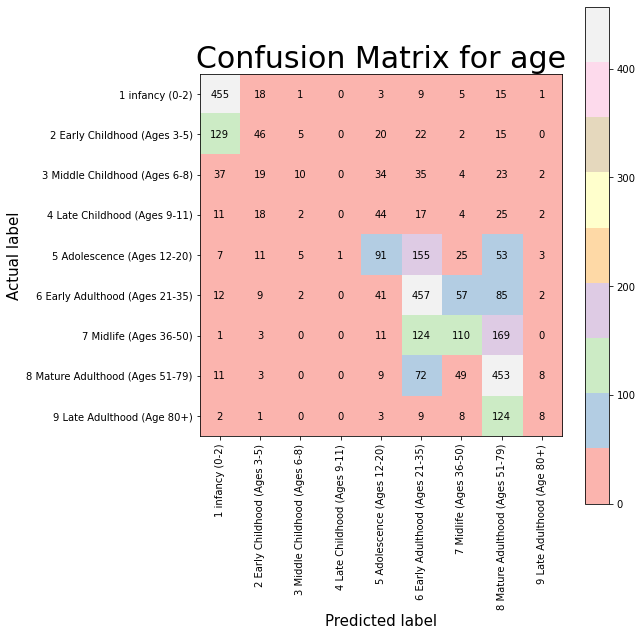

In [95]:
plt.figure(figsize=(9,9))
plt.imshow(cm_age, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion Matrix for age', size = 30)
plt.colorbar()
tick_marks = np.arange(9)
plt.xticks(tick_marks, ["1 infancy (0-2)", "2 Early Childhood (Ages 3-5)", "3 Middle Childhood (Ages 6-8)", "4 Late Childhood (Ages 9-11)", "5 Adolescence (Ages 12-20)", "6 Early Adulthood (Ages 21-35)", "7 Midlife (Ages 36-50)", "8 Mature Adulthood (Ages 51-79)", "9 Late Adulthood (Age 80+)"], rotation=90, size = 10)
plt.yticks(tick_marks, ["1 infancy (0-2)", "2 Early Childhood (Ages 3-5)", "3 Middle Childhood (Ages 6-8)", "4 Late Childhood (Ages 9-11)", "5 Adolescence (Ages 12-20)", "6 Early Adulthood (Ages 21-35)", "7 Midlife (Ages 36-50)", "8 Mature Adulthood (Ages 51-79)", "9 Late Adulthood (Age 80+)"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm_age.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm_age[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')